# Problem-
1)Telco Customer Churn Prediction: 
Churn is a one of the biggest problems in the telecom industry. 
Research has shown that the average monthly churn rate among the top 4 wireless carriers in the US is 1.9% - 2%.

Objective: To create a classification filter (Using Logistics Regression & KNN Classification Algorithm)
to determine Churn from Telecom dataset. Compare the performance of the filters.


In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train= pd.read_csv('Telecom churn train.csv')
test= pd.read_csv('Telecom churn test.csv')

In [4]:
train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [5]:
train.shape

(667, 20)

In [6]:
test.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


We can use the info() method to output some general information about the dataframe

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [8]:
train['Churn'].dtype

dtype('bool')

In [9]:
# Checking for missing value and duplicate value 
train.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

# Checking duplicate value

In [10]:
len(train[train.duplicated()])

0

As of now there are 667 rows and 17 coumns in above dataset.
out of which there is 1 boolean data type i.e Churn
8 float data type 
8integer data type ,
1 object data type i.e catagarical value(State)
there are no missing value present , so need to do the missing imputation,
And also there are no duplicate value in the dataset

# EXPLORATORY DATA ANALYSIS OF THE DATA SET

Analyzing what the dependant variable said to us i.e 'CHURN'

In [11]:
train['Churn'].unique()

array([False,  True])

In [12]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,667.0,102.841079,40.819480,1.00,76.00,102.00,128.000,232.00
Area code,667.0,436.157421,41.783305,408.00,408.00,415.00,415.000,510.00
Number vmail messages,667.0,8.407796,13.994480,0.00,0.00,0.00,20.000,51.00
Total day minutes,667.0,180.948126,55.508628,25.90,146.25,178.30,220.700,334.30
Total day calls,667.0,100.937031,20.396790,30.00,87.50,101.00,115.000,165.00
Total day charge,667.0,30.761769,9.436463,4.40,24.86,30.31,37.520,56.83
Total eve minutes,667.0,203.355322,49.719268,48.10,171.05,203.70,236.450,361.80
Total eve calls,667.0,100.476762,18.948262,37.00,88.00,101.00,113.000,168.00
Total eve charge,667.0,17.285262,4.226160,4.09,14.54,17.31,20.095,30.75
Total night minutes,667.0,199.685307,49.759931,23.20,167.95,201.60,231.500,367.70


In [13]:
train.describe(include=['object']).T

,count,unique,top,freq
State,667,51,AZ,19
International plan,667,2,No,614
Voice mail plan,667,2,No,478


In [14]:
# printing the count of time and false in 'Churn' feauture
train["Churn"].value_counts()

False    572
True      95
Name: Churn, dtype: int64

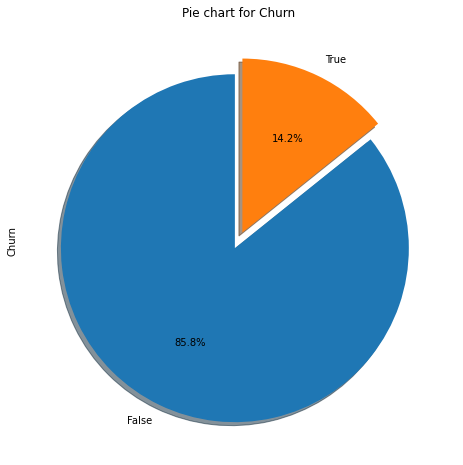

In [15]:
# To get the pie chart to analyze churn
train['Churn'].value_counts().plot.pie(explode=[0.05,0.05],autopct='%1.1f%%', startangle=90 , shadow=True,figsize=(8,8))
plt.title('Pie chart for Churn')
plt.show()

<AxesSubplot:xlabel='Churn', ylabel='count'>

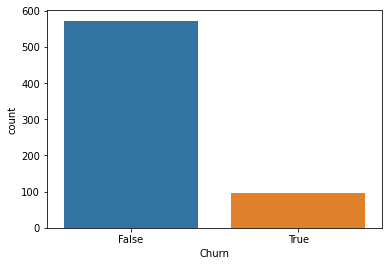

In [16]:
sns.countplot(x=train['Churn'])

After analyzing the churn columns, we had little to say almost 14% of customer have churned .

# Analyzing State columns 

In [17]:
# printing the unique value of state column
train['State'].unique()

array(['LA', 'IN', 'NY', 'SC', 'HI', 'AK', 'MI', 'ID', 'VA', 'WI', 'MN',
       'VT', 'MT', 'MA', 'KY', 'CO', 'AZ', 'CA', 'WA', 'NE', 'OH', 'MO',
       'AL', 'NH', 'NM', 'OR', 'TX', 'MS', 'WY', 'FL', 'KS', 'NC', 'SD',
       'OK', 'CT', 'RI', 'DE', 'UT', 'NV', 'DC', 'ME', 'IL', 'NJ', 'MD',
       'WV', 'PA', 'ND', 'AR', 'TN', 'IA', 'GA'], dtype=object)

In [18]:
# train['State'].unique().count

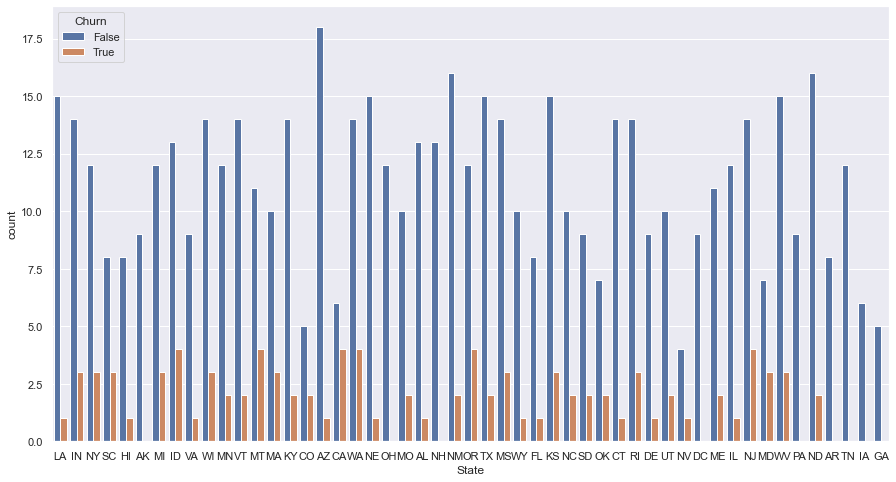

In [19]:
# Comparing state and churn using countplot
sns.set(style='darkgrid')
plt.figure(figsize=(15,8))
ax=sns.countplot(x='State',hue='Churn',data=train)
plt.show()

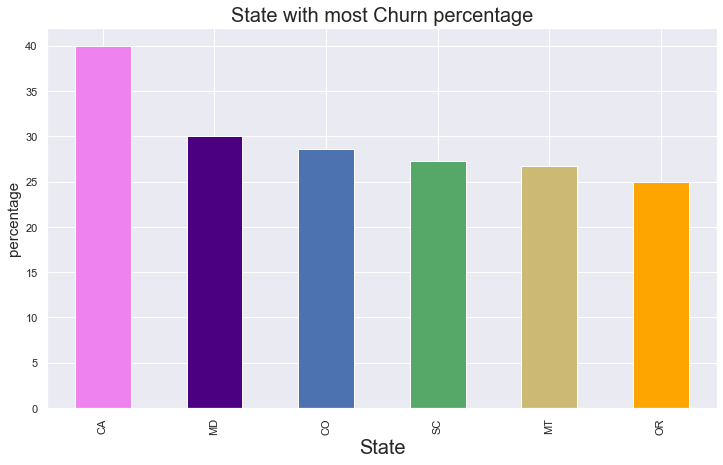

In [20]:
plt.rcParams['figure.figsize']=(12,7)
color=plt.cm.copper(np.linspace(0,0.5,20))
((train.groupby(['State'])['Churn'].mean())*100).sort_values(ascending=False).head(6).plot.bar(color=['violet','indigo','b','g','y','orange','r'])
plt.title("State with most Churn percentage",fontsize=20)
plt.xlabel('State',fontsize=20)
plt.ylabel('percentage',fontsize=15)
plt.show()


In [21]:
# calculating state vs churn percentage 
state_data=pd.crosstab(train['State'],train['Churn'])
state_data['Percentage_Churn']=state_data.apply(lambda x: x[1]*100/(x[0]+x[1]),axis=1)
print(state_data)


Churn  False  True  Percentage_Churn
State                               
AK         9     0          0.000000
AL        13     1          7.142857
AR         8     0          0.000000
AZ        18     1          5.263158
CA         6     4         40.000000
CO         5     2         28.571429
CT        14     1          6.666667
DC         9     0          0.000000
DE         9     1         10.000000
FL         8     1         11.111111
GA         5     0          0.000000
HI         8     1         11.111111
IA         6     0          0.000000
ID        13     4         23.529412
IL        12     1          7.692308
IN        14     3         17.647059
KS        15     3         16.666667
KY        14     2         12.500000
LA        15     1          6.250000
MA        10     3         23.076923
MD         7     3         30.000000
ME        11     2         15.384615
MI        12     3         20.000000
MN        12     2         14.285714
MO        10     2         16.666667
M

In [22]:
# showing the top 10 most churn state on basis of above list
train.groupby(['State'])['Churn'].mean().sort_values(ascending= False).head(10)

State
CA    0.400000
MD    0.300000
CO    0.285714
SC    0.272727
MT    0.266667
OR    0.250000
ID    0.235294
MA    0.230769
OK    0.222222
NJ    0.222222
Name: Churn, dtype: float64

There are 51 unique state present who have different churn rate. 
From the above analysis CA,MD,CO,SC,MT are the most ones who have a higher churn rate of more than 25 %. 
The reason for this churn rate from a particular state may be due to the low coverage of the cellular network .


# Analyzing Area Code column

In [23]:
# calculating Area Cide vs churn percentage 
Areacode_data=pd.crosstab(train['Area code'],train['Churn'])
Areacode_data['Percentage_Churn']=Areacode_data.apply(lambda x: x[1]*100/(x[0]+x[1]),axis=1)
print(Areacode_data)

Churn      False  True  Percentage_Churn
Area code                               
408          141    28         16.568047
415          296    41         12.166172
510          135    26         16.149068


In the above dataset , we notice that there are only 3 unique value i.e 408,415,510and churn rate of these code are almost same .
We don't think there is any relation present between 'area code' and 'churn' due to which customer will leave the operator.

# Analyzing International Plan

In [24]:
train['International plan'].value_counts()

No     614
Yes     53
Name: International plan, dtype: int64

In [25]:
Internatinal_plan_data=pd.crosstab(train['International plan'], train['Churn'])
Internatinal_plan_data['Percentage_Churn']=Internatinal_plan_data.apply(lambda x: x[1]*100/(x[0]+x[1]),axis=1)
print(Internatinal_plan_data)


Churn               False  True  Percentage_Churn
International plan                               
No                    538    76         12.377850
Yes                    34    19         35.849057


<AxesSubplot:xlabel='International plan', ylabel='count'>

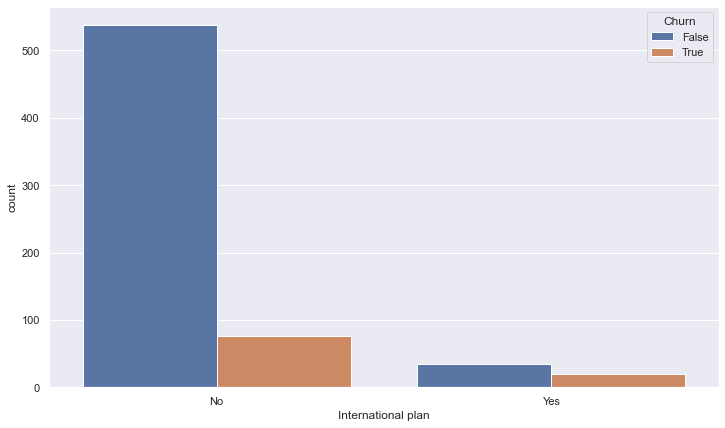

In [26]:
#Analysing by using couuntplot
sns.countplot(x='International plan',hue='Churn',data=train)

From above analysis we get that who have international plan 35.84% people churn.
whereas among those who don't have international plan only 12.37% people churn .
So, basically the people who bought international plan are churning in big number .
Probably because of connectivity issues or high all charge .

# Analyzing Voice mail plan column

In [27]:
train['Voice mail plan'].value_counts() 

No     478
Yes    189
Name: Voice mail plan, dtype: int64

In [28]:
# calculating Customer service calls vs churn percentage 
Voice_mail_plan_data=pd.crosstab(train['Voice mail plan'],train['Churn'])
Voice_mail_plan_data['Percentage_Churn']=Voice_mail_plan_data.apply(lambda x: x[1]*100/(x[0]+x[1]),axis=1)
print(Voice_mail_plan_data)

Churn            False  True  Percentage_Churn
Voice mail plan                               
No                 398    80         16.736402
Yes                174    15          7.936508


From above analysis we get that who have Voice mail plan 8% people churn.
So, basically the people who bought Voice mail plan are churning in small number, it can be reduced by giving discount the plan or some other sceme related to voice plan .


# Analyzing Number vmail messages column

In [29]:
train['Number vmail messages'].value_counts() 

0     478
29     14
36     11
27     10
31     10
33      9
28      9
30      9
26      9
20      8
35      8
39      8
22      8
32      8
21      6
41      6
23      6
34      6
24      5
19      5
37      4
25      4
38      3
40      3
45      2
14      2
11      2
17      2
42      2
48      2
16      2
13      1
18      1
49      1
15      1
51      1
46      1
Name: Number vmail messages, dtype: int64

In [30]:
train['Number vmail messages'].value_counts() 

0     478
29     14
36     11
27     10
31     10
33      9
28      9
30      9
26      9
20      8
35      8
39      8
22      8
32      8
21      6
41      6
23      6
34      6
24      5
19      5
37      4
25      4
38      3
40      3
45      2
14      2
11      2
17      2
42      2
48      2
16      2
13      1
18      1
49      1
15      1
51      1
46      1
Name: Number vmail messages, dtype: int64

<AxesSubplot:xlabel='Number vmail messages', ylabel='Density'>

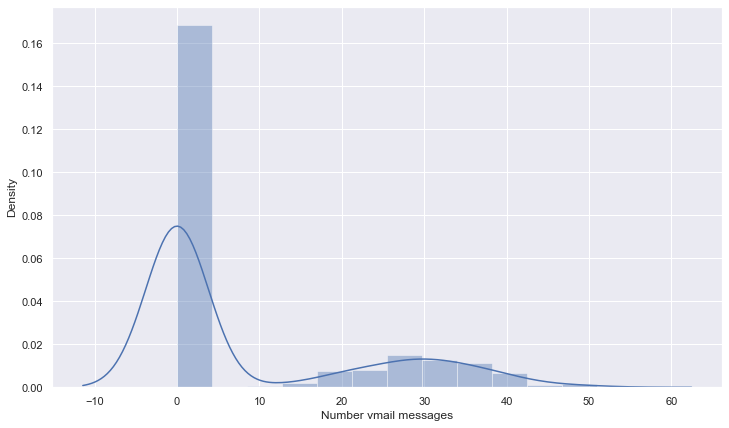

In [31]:
#Analysing by displot 
sns.distplot(train['Number vmail messages'])


After analyzing above Number voice mail feature data we get an insight that when there are more than 20 voice mail mesages the there is a churn .
For that, we need to improve the quality of voice mail.

# Analyzing Customer service column

In [32]:
train['Customer service calls'].value_counts() 

1    236
2    151
0    142
3     81
4     33
5     17
6      5
8      1
7      1
Name: Customer service calls, dtype: int64

In [33]:
# calculating Customer service calls vs churn percentage 
Customer_service_calls_data=pd.crosstab(train['Customer service calls'],train['Churn'])
Customer_service_calls_data['Percentage_Churn']=Customer_service_calls_data.apply(lambda x: x[1]*100/(x[0]+x[1]),axis=1)
print(Customer_service_calls_data)

Churn                   False  True  Percentage_Churn
Customer service calls                               
0                         129    13          9.154930
1                         213    23          9.745763
2                         126    25         16.556291
3                          74     7          8.641975
4                          21    12         36.363636
5                           6    11         64.705882
6                           1     4         80.000000
7                           1     0          0.000000
8                           1     0          0.000000


<AxesSubplot:xlabel='Customer service calls', ylabel='count'>

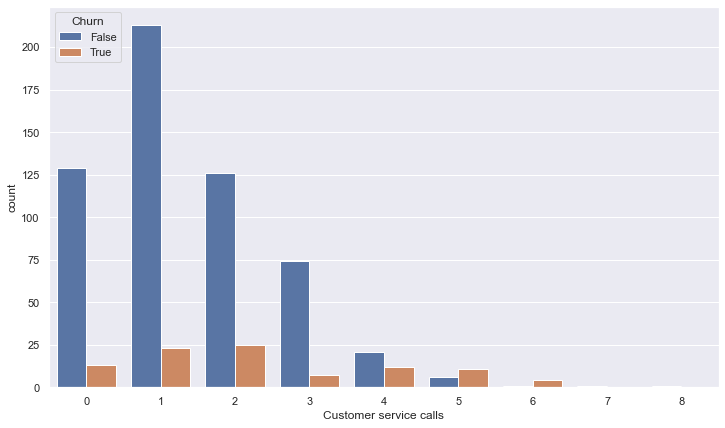

In [34]:
sns.countplot(x='Customer service calls',hue='Churn',data=train)

It is observed from above analysis that , mostly because of bad customer service, people tend to leave the operator.
The above data indicating that those customers who called the service 5 times or above those customer churn percentage is higher than 60%


NOTE- 
•	Total day minutes  ,Total day calls,  Total day charge ,Total eve minutes  ,Total eve calls ,Total eve charge ,Total night minutes  ,Total night calls ,Total night charge ,Total intl minutes ,Total intl calls  ,Total intl charge , these columns didn’t play any kind of role regarding the churn rate .



In [35]:
train['Total charge'] = train['Total day charge'] + train['Total eve charge'] + train['Total night charge'] + train['Total intl charge']
test['Total charge'] = test['Total day charge'] + test['Total eve charge'] + test['Total night charge'] + test['Total intl charge']


In [36]:
train['Total charge'] 

0      73.32
1      54.20
2      92.29
3      41.05
4      49.60
       ...  
662    50.79
663    44.06
664    53.20
665    57.52
666    57.53
Name: Total charge, Length: 667, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Data Cleaning and transformation¶

Now,we'll clean the data and prepare it for prediction.

As you noticed earlier, when we used .info() with both train and test datasets, we haven't found any null values ( luckily!), but if we had found them, we would either drop columns with the missing values or impute the missing values to the mean, median or mode of the values in the same column.

We still have columns with categorical values though (dtype = object), so we should deal with them because predictive models deal only with numerical values.

For 'Churn', 'International plan' and 'Voice mail plan' columns, I will use multiple techniques to deal with categorical values for illustration purpose, but you can use only one of them if you want, since each of the 3 column has only 2 unique values.



In [38]:
train['Churn'].dtype

dtype('bool')

In [39]:
train['Churn'] = train['Churn'].map({True:1,False:0}) # no need to do it for test dataset because Churn column will be dropped later
# train['Churn'].replace(['True','False'],[1,0],inplace=True)

In [40]:
train['Churn']

0      0
1      1
2      1
3      0
4      0
      ..
662    0
663    0
664    0
665    0
666    0
Name: Churn, Length: 667, dtype: int64

In [41]:
train['International plan'].replace(['No','Yes'],[0,1],inplace=True)

test['Churn'] = test['Churn'].map({True:1,False:0})
test['International plan'].replace(['No','Yes'],[0,1],inplace=True)

encoder = LabelEncoder()
voice_train = encoder.fit_transform(train['Voice mail plan'])
train['Voice mail plan'] = voice_train

voice_test = encoder.transform(test['Voice mail plan'])
test['Voice mail plan'] = voice_test

In [42]:
train['Churn']

0      0
1      1
2      1
3      0
4      0
      ..
662    0
663    0
664    0
665    0
666    0
Name: Churn, Length: 667, dtype: int64

In [43]:
test['Churn']

0       0
1       0
2       0
3       0
4       0
       ..
2661    0
2662    0
2663    0
2664    0
2665    0
Name: Churn, Length: 2666, dtype: int64

<AxesSubplot:>

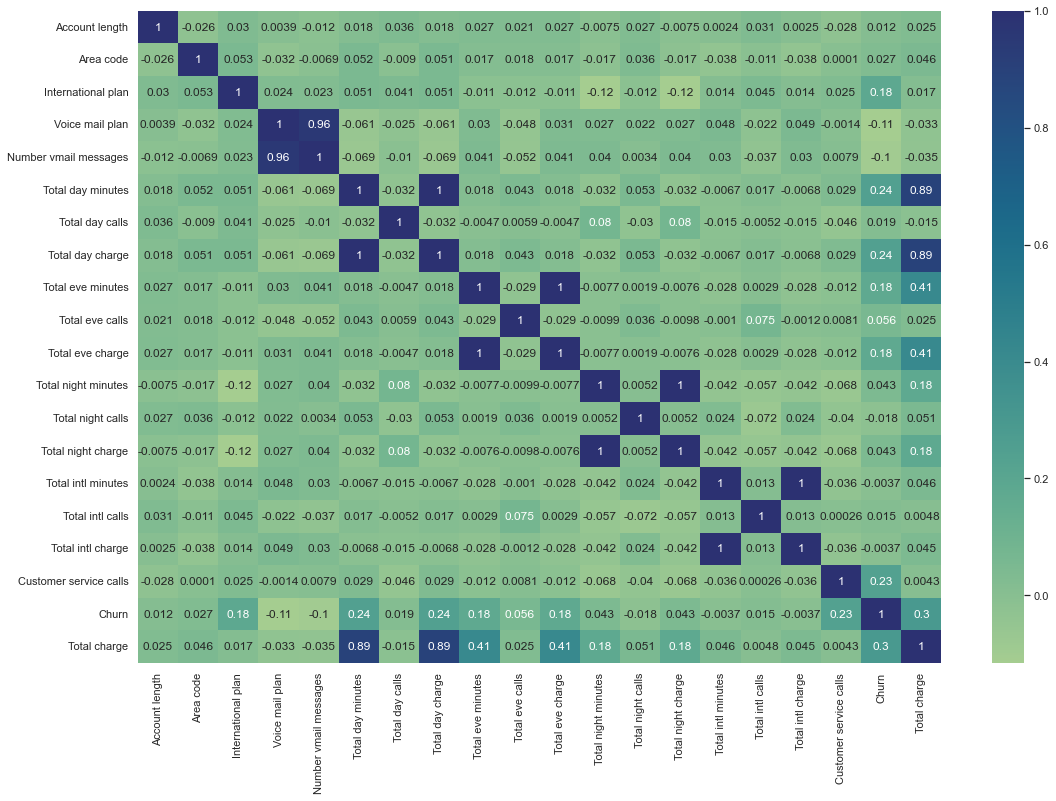

In [44]:
plt.figure(figsize=(18,12))
sns.heatmap(train.corr() , annot =True,cmap='crest')

Some features are correlated to each other and have a high coefficient.
Total day minutes and Total day charge are directly related because their coeff is 1 hence let's delete all the columns with the minutes count since they are redundant.

In [45]:
train.drop(['Total day minutes','Total eve minutes','Total night minutes', 'Total intl minutes'], inplace=True,axis=1)

In [46]:
feat_cols = ['International plan','Total charge','Customer service calls']
X_train = train[feat_cols]
y_train = train['Churn']
X_test = test[feat_cols]
y_test = test['Churn']

In [47]:
X_train.head()

,International plan,Total charge,Customer service calls
0,0,73.32,1
1,0,54.20,4
2,0,92.29,4
3,0,41.05,2
4,0,49.60,1


In [48]:
y_test

0       0
1       0
2       0
3       0
4       0
       ..
2661    0
2662    0
2663    0
2664    0
2665    0
Name: Churn, Length: 2666, dtype: int64

In [49]:
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [50]:
X_train

array([[-0.29380132,  1.27851712, -0.4230984 ],
       [-0.29380132, -0.52928064,  1.82855024],
       [-0.29380132,  3.07213238,  1.82855024],
       ...,
       [-0.29380132, -0.62383074,  1.0780007 ],
       [-0.29380132, -0.21537434, -0.4230984 ],
       [ 3.40366063, -0.21442884,  0.32745115]])

In [51]:
X_test

array([[-0.29380132,  1.49030933, -0.4230984 ],
       [-0.29380132, -0.05274818, -0.4230984 ],
       [-0.29380132,  0.2356296 , -1.17364794],
       ...,
       [-0.29380132,  0.35287172,  1.0780007 ],
       [-0.29380132,  0.75092761,  0.32745115],
       [-0.29380132,  1.62740697, -1.17364794]])

# Let's predict using logistic regression¶


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
# X_train ,X_test ,y_train,y_test=train_test_split(X,y,train_size=0.8)

In [54]:
X_train.shape

(667, 3)

In [55]:
y_train.shape

(667,)

In [56]:
X_test.shape

(2666, 3)

In [57]:
y_test.shape

(2666,)

In [58]:
logistic_model=LogisticRegression()
logistic_model.fit(X_train, y_train)
predictions = logistic_model.predict(X_test)

In [59]:
score = logistic_model.score(X_test, y_test)
print("Percentage Accuracy with logistic model is ",score*100)

Percentage Accuracy with logistic model is  85.5588897224306


In [60]:
#Calculating Details
acc_log_train_LGR = round(logistic_model.score(X_train, y_train) * 100, 2)
acc_log_test_LGR= round(logistic_model.score(X_test, y_test) * 100, 2)
print('LogisticRegression Train Score is : ',  acc_log_train_LGR)
print('LogisticRegression test Score is : ' , acc_log_test_LGR)

LogisticRegression Train Score is :  86.06
LogisticRegression test Score is :  85.56


In [61]:
#Calculating Prediction
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test , predictions )

print('Percentage Accuracy with logistic model is  = ', accuracy*100 )

Percentage Accuracy with logistic model is  =  85.5588897224306


In [82]:
accuracy

0.8555888972243061

In [62]:
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2278
           1       0.51      0.15      0.23       388

    accuracy                           0.86      2666
   macro avg       0.69      0.56      0.58      2666
weighted avg       0.82      0.86      0.82      2666



Text(0.5, 1.0, 'Logistic Matrix')

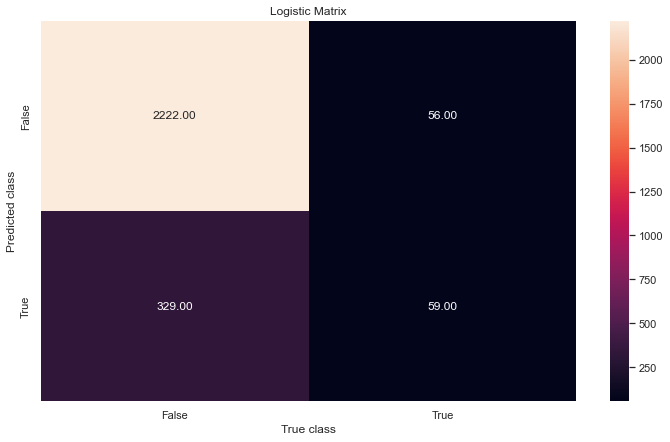

In [63]:
from sklearn.metrics import confusion_matrix
logistic_cm = confusion_matrix(y_test,predictions)
sns.heatmap(logistic_cm, annot=True, fmt='.2f', xticklabels=['False','True'],yticklabels=['False','True'])
plt.xlabel('True class')
plt.ylabel('Predicted class')
plt.title('Logistic Matrix')

# Let's predict using KNN¶

In [64]:
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


# from kmodes.kmodes import KModes

In [65]:
chosen_model = KNeighborsClassifier()
param = {'n_neighbors': [1,2,3,4,5,6,7]}
grid = GridSearchCV(estimator= chosen_model, param_grid=param, cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'n_neighbors': 5}


In [66]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
pred_val = knn_model.predict(X_test)

In [67]:
#Calculating Details
acc_knn_train = round(knn_model.score(X_train, y_train) * 100, 2)
acc_knn_test =round(knn_model.score(X_test, y_test) * 100, 2)
print('KNN Train Score is : ',  acc_knn_train )
print('KNN test Score is : ' , acc_knn_test )

KNN Train Score is :  93.4
KNN test Score is :  91.19


In [68]:
#Calculating Prediction
from sklearn.metrics import accuracy_score
print('KNN accuracy: {:.3f}'.format(accuracy_score(y_test,pred_val)))

KNN accuracy: 0.912


In [84]:
knn_accuracy=accuracy_score(y_test,pred_val)
knn_accuracy

0.9118529632408102

In [85]:
print(accuracy,knn_accuracy)

0.8555888972243061 0.9118529632408102


In [69]:
print("Classification Report:")
print(classification_report(y_test, pred_val))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2278
           1       0.77      0.56      0.65       388

    accuracy                           0.91      2666
   macro avg       0.85      0.77      0.80      2666
weighted avg       0.91      0.91      0.91      2666



Text(0.5, 1.0, 'KNN')

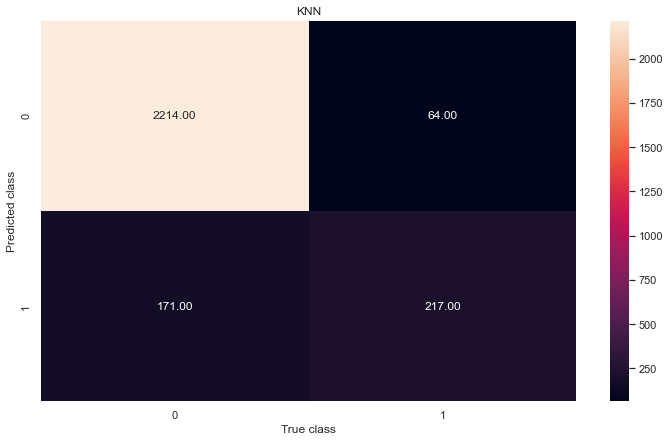

In [70]:
y_pred = knn_model.predict(X_test)
from sklearn.metrics import confusion_matrix
knn_cm = confusion_matrix(y_test,pred_val)
sns.heatmap(knn_cm, annot=True, fmt='.2f')
plt.xlabel('True class')
plt.ylabel('Predicted class')
plt.title('KNN')

From the above two classification models (Logistic and KNN). KNN is performing better than logistic regression

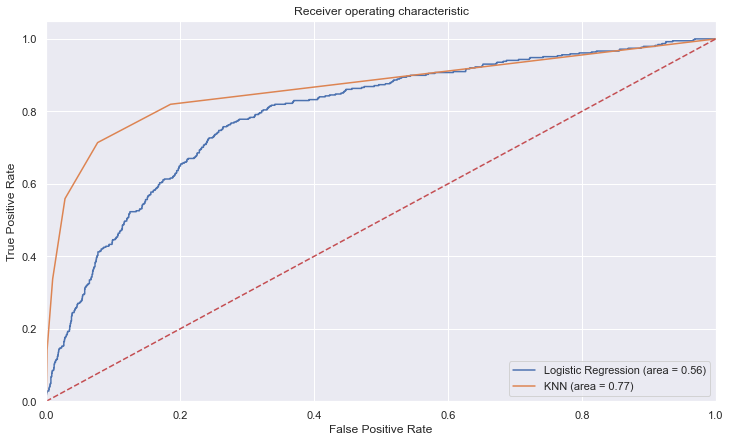

In [71]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(X_test)[:,1])
rf_roc_auc = roc_auc_score(y_test, pred_val)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='KNN (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# 	Recommendations :
1)	The company can reduce Day calls rates as there is massive difference between call rates and night calls rates.
2)	The company also look at giving offers to their subscription plans so that non subscriber of any plan can be nudged towards purchasing as subscriptions.
3)	The company can also work towards reducing international call rates so that international call plan holders will not churn the company.
4)	The company can look at reducing customer service calls by resolving the customer issues as soon as possible, because the customers are likely to churn the company as the number of calls increases.
5)	The telecom company has to provide favorable offers to the customers whose account length is above 150 as loyalty bonus so that the customers won’t churn.
6)	The company might consider the rewarding the states with high retention rates and do so very publicly so that customers from others states are motivated to join the services of the company more.
7)	The company might also consider doing surveys in low retention rates and checking whether there exits any network issues or not. 


In [97]:
# component_df = pd.DataFrame(columns=['accuracy_score'],index=['logistic','knn']) 

data1={"Accuracy_score" :[85,91]}
df=pd.DataFrame(data1,index=['logistic','knn'])
df

,Accuracy_score
logistic,85
knn,91
